In [9]:
import gym
import time

# Poprawna nazwa środowiska
env = gym.make("CartPole-v1", render_mode="human")

obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated
    time.sleep(0.01)
    if done:
        obs, info = env.reset()

env.close()


In [10]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.99
episodes = 1000
rewards = []

for episode in range(episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] += alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

    rewards.append(total_reward)


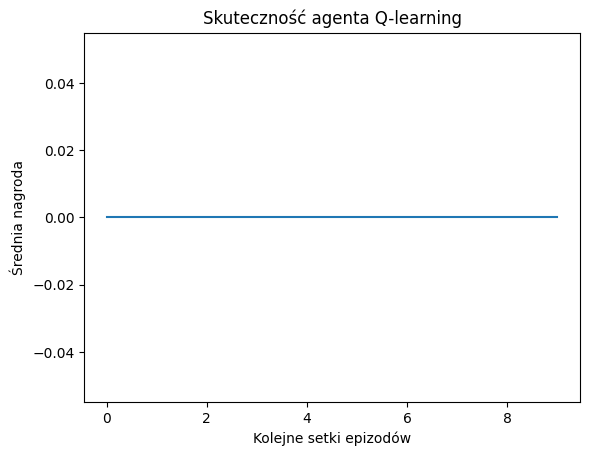

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average reward over chunks of 100 episodes
avg_rewards = [np.mean(rewards[i:i + 100]) for i in range(0, episodes, 100)]

# Plotting
plt.plot(avg_rewards)
plt.xlabel("Kolejne setki epizodów")
plt.ylabel("Średnia nagroda")
plt.title("Skuteczność agenta Q-learning")
plt.show()
